In [1]:
import sys
sys.path += ["../24_01_05消息格式转换/"]
from main18_format_transform_weight import main
from main16_map_visualization2 import visualization

查看结果

In [2]:
def show_map(map):
    N = map.N

    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            print(node.distance, end=" ")
        print()

    print("==================================")
    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            if node.best_direction == "UP":
                print("↑", end=" ")
            elif node.best_direction == "RIGHT":
                print("→", end=" ")            
            elif node.best_direction == "DOWN":
                print("↓", end=" ")            
            elif node.best_direction == "LEFT":
                print("←", end=" ")
            else:
                print("U", end=" ")
        print()

In [9]:
# map_filename = "../24_01_05消息格式转换/main18_format_transform_weight.txt"
map_filename = "../23_12_22路径优化/main7_map_input.txt"

旧格式转换思路，每个transmitter需要的格式取出现次数最多的

manhattan_scale 14
1 155
2 135
3 20
2
2 3 2 0 1 0 1 3 0 
2 1 2 0 2 0 1 2 0 
2 0 1 1 1 0 
T1: 0; tmp_cost: 0
T2: 0; tmp_cost: 0
time score: 35.0
cost score: 70
421353.76902041864


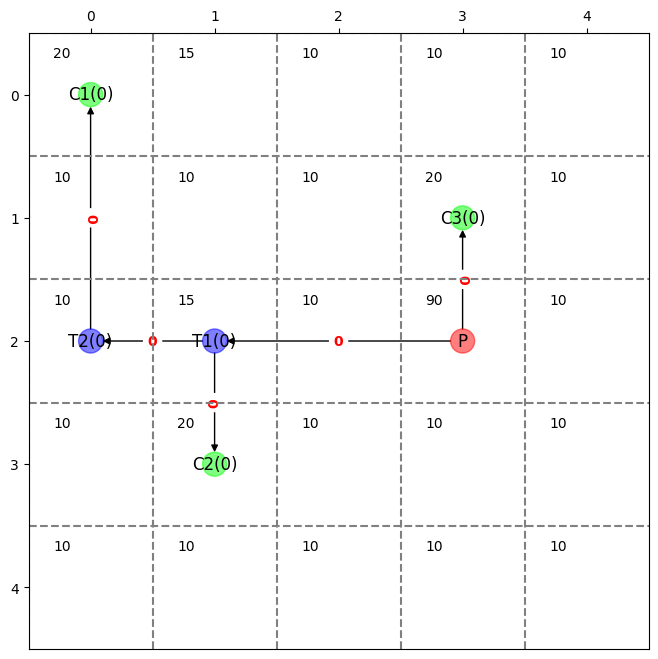

155 140 120 220 120 
135 125 110 20 110 
35 25 10 0 10 
135 135 110 10 110 
140 130 120 20 120 
↓ ↓ ↓ ← ↓ 
↓ ↓ ↓ ↓ ↓ 
→ → → U ← 
↑ ↑ ↑ ↑ ↑ 
→ → → ↑ ← 


In [10]:
map, provider, consumer_vector, transmitter_vector = main(conf_file=map_filename)
visualization(map, provider, consumer_vector, transmitter_vector)
show_map(map)

In [ ]:
def mph():
    consumer_pos_list = [(consumer.x, consumer.y) for consumer in consumer_vector]
    V = [(provider.x, provider.y)] # 初始Provider加入组播树
    G = []
    shortest_path_dict = {} # 两两结点对之间的最短路径
    for i in range(len(consumer_pos_list)):
        # 选择距离组播树最近Consumer，加入组播树，直到所有的结点完成

        # 现有Consumer无法与已有组播树相连，则及时停止